# Image dataset visualisation with keras and t-sne

Before running this the first time, you will need to install keras if you haven't done it previously!

The easiest way to do this is to open a terminal/console window and do the following:

First, if you have created a new environment (e.g., called "emi") for this class, activate it. (If you haven't created an environment then skip this step):

`conda activate emi`


You will then need to change the path of the dataset iamge folder to a directory containing images on your machine:

In [8]:
base_folder = '/Users/terence/Downloads/PinDown__Related-to-pin-832040099911877547'

Import libraries and define the model we are using to get embeddings:

In [9]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import tensorflow as tf
import os
import cv2
from glob import glob

model = VGG16(weights='imagenet', include_top=False)

Process all the images in the folder and get feature embeddings for them: 
(You may need to switch .jpg to .png if your dataset consists of png images instead of jpegs)

In [15]:
image_array = []
feature_array = []

for image_path in glob(os.path.join(base_folder, "*.png")):
    cv_img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    cv_img = cv2.resize(cv_img, (45,45))
    cv_img = cv_img.flatten()
    image_array.append(cv_img)
    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    features = tf.reshape(features, [-1])
    feature_array.append(features) 
              
image_array = np.array(image_array)
feature_array = np.array(feature_array)
print(f'processed {image_array.shape[0]} images')

processed 22 images


Check how many images have been processed. If it is 0, you will need to check to path to the image folder is correct.

Then import librares for running the visualisation:

In [16]:
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import cv2
import numpy as np
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

Define and run the t-SNE algorithm on the data:

In [17]:
tsne = TSNE(n_components=2, perplexity=40.0)
tsne_result = tsne.fit_transform(feature_array)
tsne_result_scaled = StandardScaler().fit_transform(tsne_result)

/Users/terence/miniforge3/envs/3mi/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/terence/miniforge3/envs/3mi/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Define function for visualising the t-SNE plot of images:

In [18]:
def visualize_scatter_with_images(X_2d_data, images, figsize=(15,15), image_zoom=1):
    fig, ax = plt.subplots(figsize=figsize)
    artists = []
    for xy, i in zip(X_2d_data, images):
        x0, y0 = xy
        img = OffsetImage(i, zoom=image_zoom)
        ab = AnnotationBbox(img, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(X_2d_data)
    ax.autoscale()
    plt.show()

Visualise the images from the t-SNE plot:

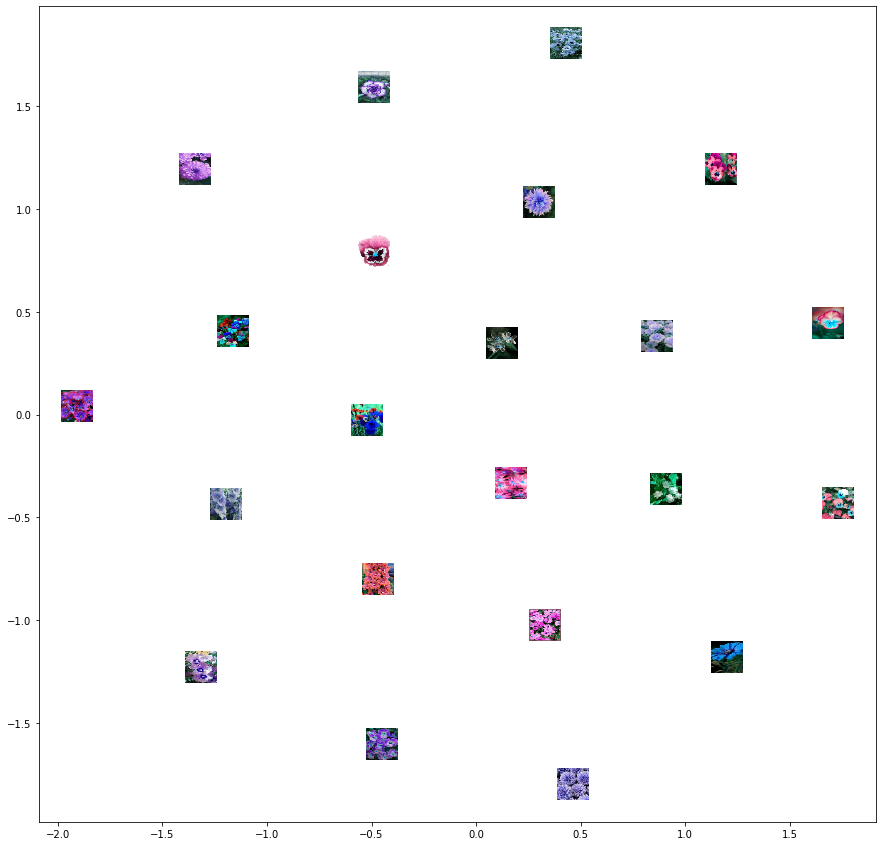

In [19]:
visualize_scatter_with_images(tsne_result_scaled, images = [np.reshape(i, (45,45,3)) for i in image_array], image_zoom=0.7)